# Research Question: 
### What is the effect of racial composition and income inequality on the U.S. COVID-19 mortality rates?

---

# Table of Contents

1. [Introduction](#Introduction)
2. [Methods & Data Cleaning](#Methods)
3. [Summary Statistics Part 1](#Summary-Statistics-Part-1-:-Project-1)
4. [Summary Statistics Part 2](#Summary-Statistics-Part-2-:-Project-2)
5. [Summary Statistics Part 3](#Summary-Statistics-Part-3-:-Project-3)
6. [Regression Results](#Regression-Results)
7. [Machine Learning](#Machine-Learning)
8. [Summary](#Summary)
9. [Future Steps](#Future-Steps)
10. [Reference](#Reference)

---

# Introduction

## 1.1 Introduction

The United States is the epicenter of the 2020 coronavirus outbreak, reporting a third of the cases and a quarter of the deaths worldwide. The United States has experienced around 22% of COVID-19 mortality while accounting just 4% of the population globally (World Health Organization, 2020). Despite significant advantages in resources and skill, the per capita mortality rate is currently around 500 per million, which is 2.4 and 6 times higher than Canada and the United Kingdom, respectively. As we approached Fall 2020, the United States was dealing with persistent breakouts across different territories and states. Furthermore, an early and persistent feature of the pandemic in the United States has been seen causing a disproportionate impact on populations that were already vulnerable due to racism, unemployment, low wages, and unaffordable housing. It is true that this COVID-19 virus has imposed a serious public health threat, and it will continue bringing additional devastating economic consequences.

In recent weeks, the unequal impact of COVID-19 across communities has become quite apparent. Data from New York and Chicago indicate that African American and Hispanic people experience disproportionately higher rates of COVID-19 mortality (Kolata, 2020). Additionally, according to the New York Times's recent investigation of smartphone location data in cities throughout the United States, many lower-income employees (the bottom 10 percentile) continue to move around during quarantine, while individuals earning more money stay at home and restrict their exposure (Buchanan et al. 2020). Inequality has further developed through economic segregation and racial composition. Given that low-income individuals are more likely to be in essential occupations with a high exposure risk to the virus and have less access to healthcare, we would like to especially look at the socio-demographic and socio-economic aspect of the COVID-19 pandemic during an early phase of the pandemic. 

Therefore, in this research, we are interested in investigating how the income inequality and racial disparity may exacerbate the impact of the COVID-19 outbreak in the US as well as how each individual factors influence the COVID-19 mortality rate in the US. In the absence of a national regulation on COVID-19, many states acted independently to implement policies such as stay-at-home order. We will also explore the possibility of the how local governments' pandemic responses affect the increased severity of the disease. 


- Y variable: US COVID-19 mortality rates
- X variable 1: Race/ethnithity
- X variable 2: Gini coefficient as a measure of inequality of incomes across individuals
- X1 & X2 are correlated: There is a considerate disparity among the wealth of different racial groups in the US.

## 1.2 Literature Review

There is a vast body of research on the effects of economic disparity on COVID-19 mortality. The data was interpreted differently in early evaluations, but the vast majority of research found that deaths due to COVID-19 was more severe in more unequal US stats. In more recent research, it studys the social determinants of the COVID-19 mortality (Takian, 2020), utilizing Gini Index as a measure of income inequality, which adds to the body of knowledge. The goal of this study is to see the effect of racial composition and income inequality on the U.S. COVID-19 mortality rates. We conducted a literature analysis within an epidemiological causal framework and used the evidence as a whole to infer the likelihood of a causal association between income inequality and COVID-19 mortality, as income inequality defines social stratifications in health and mortality (Bor, Cohen and Galea, 2015; Pickett and Wilkinson, 2015). Current literature discusses that income inequality, racial disparities, and government health measures, each factor may be associated with COVID-19 mortality to different extents. Comparably, most literature often focus on a single racial, social or economic factor, whereas this study examines the relationship between COVID-19 mortality and all three dimensions. After controlling for other socioeconomic determinants, evidence demonstrates that economic and racial disparity has an impact on the US mortality on the state level during the early stage of the COVID-19 pandemic.

---

# Methods

This research examined the association among income inequality and racial disparity with the number of COVID-19 deaths. The Gini coefficient is a number that demonstrates a degree of inequality in a distribution of income. Thus, in developing a complete picture of US income inequality, our state-level income inequality data was measured by the Gini index extracted from the 2010 American Community Survey. The Gini coefficient ranges in value from 0 to 1, with a higher value indicating a greater inequality. The state-level racial composition in 2017 was extracted from the 2017 US Census data. The number of deaths was calculated using the COVID-19 Dashboard, a dataset hosted by the Center for Systems Science and Engineering at Johns Hopkins University. Eventually, we do a horizontal comparison among the state-level mortality and the population of different racial groups. Most importantly, this analysis only focuses on the 50 US states and using data from January 15, 2020, through December 15, 2020.

## Data Cleaning
 We limited our analysis to the 50 states in the US over the early period of the COVID-19 pandemic from January, 2020, through December, 2020.

- 
Import packages and load dataset

In [198]:
# !pip install pandas plotnine
# !pip install statsmodels
# # get latest version of pip
# !pip install --upgrade pip
# # for calender map
# !pip install calmap
# # to convert us statenames to state codes
# ! pip install us
# # to get continent name from country name
# ! pip install pycountry_convert

Import packages

In [199]:
# import packages 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
import datetime as dt
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
import plotnine
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [200]:
# load dataset

deaths_df = pd.read_csv("time_series_covid19_deaths_US.csv", sep = ",")
gini_df = pd.read_csv("Gini_Household Income for States- 2009 to 2010.csv", sep = ",")
demographics_df = pd.read_csv("acs2017_census_tract_data.csv", sep = ",")
covid_df = pd.read_csv("covid19_us_county.csv")

Import the data and call them in JupyterNotebook

### Data Cleaning Part 1

In [201]:
# Using demographics_df dataset to get its columns 
list(demographics_df)

# Get info about how many counties in each state.

# Isolate unique values in "State" 
print(set(demographics_df['State']))

# counts number of counties in each state
county = demographics_df[['State','County']].groupby('State').agg('count')
county.sort_values('County', ascending = 0)
county.sort_index()
county = county.drop(["District of Columbia", "Puerto Rico"])

{'New Jersey', 'California', 'Missouri', 'Mississippi', 'District of Columbia', 'Kentucky', 'Michigan', 'Delaware', 'New Mexico', 'New York', 'Utah', 'North Dakota', 'Arizona', 'Connecticut', 'Florida', 'Ohio', 'South Dakota', 'Alabama', 'New Hampshire', 'South Carolina', 'West Virginia', 'Montana', 'Nevada', 'Kansas', 'Alaska', 'Puerto Rico', 'Indiana', 'Maryland', 'Oklahoma', 'Colorado', 'Pennsylvania', 'Maine', 'Wisconsin', 'Wyoming', 'North Carolina', 'Vermont', 'Louisiana', 'Arkansas', 'Oregon', 'Tennessee', 'Minnesota', 'Nebraska', 'Rhode Island', 'Virginia', 'Texas', 'Georgia', 'Hawaii', 'Idaho', 'Washington', 'Iowa', 'Illinois', 'Massachusetts'}


In [202]:
# group by state 
poverty_df = demographics_df.groupby('State').mean().loc[:,'Poverty'].to_frame()
agg_demo_df = demographics_df.groupby('State').sum()
race = agg_demo_df.loc[:,"Hispanic":"Pacific"]

poverty_df

total_pop = agg_demo_df.get("TotalPop").to_frame()
total_pop
poverty = agg_demo_df.get("Poverty")

frames = [total_pop, poverty_df, race]
demo_df= pd.concat(frames, axis = 1)
demo_result = demo_df.drop(['District of Columbia', 'Puerto Rico'] )


### Data Cleaning Part 2

In [203]:
# Browse through the US COVID deaths Database
deaths_df.head()
# Get the total COVID-19 deaths in each of the 50 states as well as the daily death number from 
# March 15 to December 15 in 2020.

deaths = deaths_df.set_index("Province_State").loc[:, '3/15/20':'12/15/20']
deaths_state = deaths.groupby('Province_State', as_index=True).sum()
deaths_total = deaths_state.sum(axis=1)
pop = deaths_df.set_index("Province_State").loc[:, "Population"]
pop = pop.groupby('Province_State',as_index=True).sum()


# Combine the total death levels in each state with daily deaths during the selected period based on state.
deaths_result = pd.concat([pop, deaths_total, deaths_state], axis = 1)

deaths_result = deaths_result.drop(['American Samoa', 'District of Columbia', 'Grand Princess', 'Diamond Princess', 'Northern Mariana Islands','Puerto Rico', 'Virgin Islands','Guam'])
deaths_update = deaths_result.rename(columns={deaths_result.columns[1]: 'Total COVID-19 Deaths'})
deaths_update.index.names = ['State']
 
# Compute the state-level Mortality rate using "COVID-19 Mortality Rate" divided by "Population"
deaths_update["COVID-19 Mortality Rate"] = deaths_update["Total COVID-19 Deaths"]/deaths_update["Population"]

# shift column 'COVID-19 Mortality Rate' to third position
third_column = deaths_update.pop('COVID-19 Mortality Rate')
# insert column into the table
deaths_update.insert(2, 'COVID-19 Mortality Rate', third_column)
deaths_clean = deaths_update

# Data Cleaning Completed


### Data Cleaning Part 3

In [204]:
# Browse through the Gini Index of 50 US states in 2010 derived from the 2010 American Community Survey.
gini_df
# Drop the data for District of Columbia to get data of 50 states
gini = gini_df.drop([8])
gini_clean = gini.set_index("State")

# Data Cleaning Completed

---

# Summary Statistics Part 1 : Project 1

## 3.1 Figure 1. The Spread of COVID-19 Deaths Across 50 US States in June 2020

### THE MESSAGE:
We want to first explore how each states were hit by the coronavirus throught the first half of the year 2020.
To achive this, we set X-variable to be time and Y-variable to be the total number of comfirmed deaths in the U.S.

In [205]:
covid_df['date'] = pd.to_datetime(covid_df['date'])

In [206]:
# Import libraries

import plotly.graph_objects as go

# Get the latest date
latest_covid_df = covid_df[covid_df.date == covid_df.date.max()]
us_state_df = covid_df.groupby(['date', 'state'], as_index=False).sum()
us_state_df['date2'] = us_state_df['date'].astype('str')
max_date = covid_df.date.max()

fig = go.Figure()

states = latest_covid_df.groupby(['state'], as_index=False).sum().sort_values('deaths', ascending=False).head(50).state.values
for astate in reversed(states):
    astate_df = us_state_df[us_state_df['state'] == astate]
    fig.add_trace(go.Scatter(
        x=astate_df['date'], y=astate_df['deaths'],
        mode='lines',
        line=dict(width=0.5),
        stackgroup='one',
        name=astate
    ))

fig.update_layout(
    title = '50 US States - Total Confirmed Deaths - {0}'.format(max_date),
    showlegend=True,
    xaxis_type='date',
    xaxis=dict(
        range=(us_state_df.date.min(), us_state_df.date.max() + dt.timedelta(days=10)), title='Time'
    ),
    yaxis=dict(
        type='linear',
        title='Total Confirmed Deaths'
    ))

fig.show()

### Observation: 
Up until June 13, 2020, New York has reported the highest number of total comfirmed deaths among the 50 US states, followed by New Jersey, Massachesetts, Illinois, Pennsylvania. We can conclude that the East Coast was the most affected regions during the first wave of the COVID-19 pandemic in 2020.

## 3.2 Figure 2. The Most Affected US States during June 2020

###  THE MESSAGE:
We want to highlight the COVID-19 severity on state-level demographics by highlighting the top 10 US states that were the most affected by the COVID-19 pandemic in terms of both case number and death number back in June 2020. To illustrate this, we use a horizontal bar chart and set the X-variable to be the number of comfirmed cases and Y-variable to be U.S. states.

In [207]:
# Call data and select columns that we want.
df_temp = pd.read_csv("Daily report 6-13-2020.csv")
df_usa = df_temp.loc[df_temp["Country_Region"]== "US"]
df_usa = df_usa.rename(columns={"Admin2":"County"})

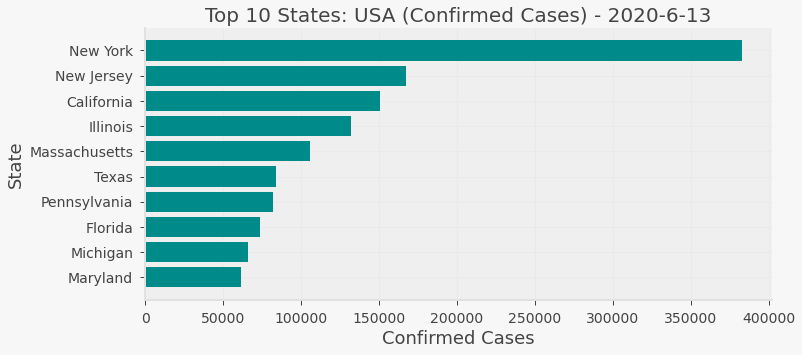

In [208]:
# Plot the bar chart
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.barh(df_usa.groupby(["Province_State"]).sum().sort_values('Confirmed')["Confirmed"].index[-10:],df_usa.groupby(["Province_State"]).sum().sort_values('Confirmed')["Confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 14)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.ylabel("State",fontsize=18)
plt.title("Top 10 States: USA (Confirmed Cases) - 2020-6-13",fontsize=20)
plt.grid(alpha=0.3)


### Observation:
From the bar chart above, it shows that New York, New Jersey, California, Illinois, Massachusetts, Texas, Pennsylvania, Florida, Michigan, Maryland are the Top 10 states with the highest comfirmed case numbers at the time of June 13, 2020. Most importantly, while New York had the most confirmed cases among all 50 states, the number confirmed cases found in New York was two times more than New Jersey which had the second hightest confirmed cases.

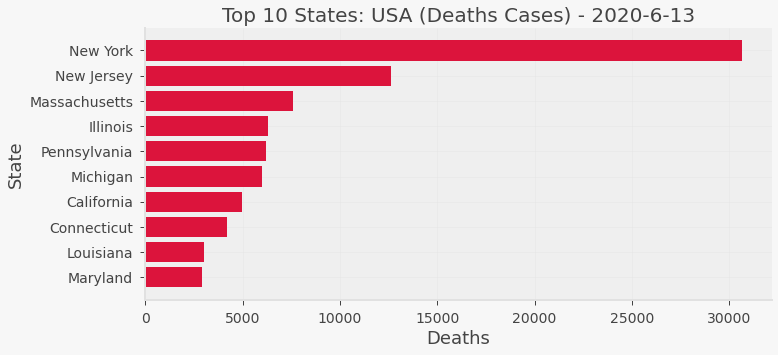

In [209]:
# Plot the bar chart
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.barh(df_usa.groupby(["Province_State"]).sum().sort_values('Deaths')["Deaths"].index[-10:],df_usa.groupby(["Province_State"]).sum().sort_values('Deaths')["Deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 14)
plt.xlabel("Deaths",fontsize=18)
plt.ylabel("State",fontsize=18)
plt.title("Top 10 States: USA (Deaths Cases) - 2020-6-13",fontsize=20)
plt.grid(alpha=0.3)

### Observation:
From the bar chart above, it shows that New York, New Jersey, California, Illinois, Massachusetts, Texas, Pennsylvania, Florida, Michigan, Maryland are the Top 10 states with the highest comfirmed case numbers at the time of June 13, 2020. Most significantly, while New York had the most COVID-19 deaths among all 50 states, the number of deaths found in New York was drastically higher than the rest of states.

## 3.3 Figure 3:  US State-Level Unemployment rate vs Poverty Rate, 2017 Census
### THE MESSAGE: 
Exploring the relationship between poverty rate and unemployment rate among the Six Most Affected US States. To illustrating this, we incorporate scatterplot combined with a heat map by setting independent variable to be 2017 US state-level Uunemployment rate anf the Dependent variable to be 2017 US State-level Poverty Rate.

First, we performed correlation analyses between between poverty rate and unemployment rate in California, Florida, Illinois, New York, Pennsylvania, and Texas respectively.

In [210]:
# group by state 
agg_df = demographics_df.groupby('State').sum()

# order by total population 
agg_df.sort_values('TotalPop', ascending = 0)

# Create a new dataset which contains data of states with top 5 total population
ca = demographics_df.groupby('State').get_group('California')
tx = demographics_df.groupby('State').get_group('Texas')
ny = demographics_df.groupby('State').get_group('New York')
fl = demographics_df.groupby('State').get_group('Florida')
il = demographics_df.groupby('State').get_group('Illinois')
pn = demographics_df.groupby('State').get_group('Pennsylvania')
df_6 = pd.concat([ca,tx,ny,fl,il,pn])

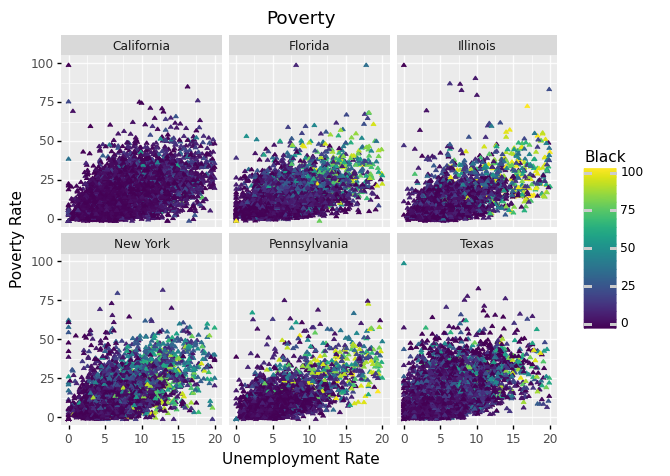

<ggplot: (8788328380660)>

In [211]:
from plotnine import *

ggplot(df_6, aes(x='Unemployment', y='Poverty',color='Black')) + \
      geom_point(shape = 6) + \
      xlim(0, 20) + \
      xlab('Unemployment Rate') + ylab('Poverty Rate') + ggtitle('Poverty') + \
      facet_wrap("State")

### Obeservation:
From the graph above, we can find a positive relationship between poverty rate and unemployment rate in California, Florida, Illinois, New York, Pennsylvania, and Texas respectively, which are the top six states with the largest population size. We can observe that for each state, as the unemployment rate grows larger, it often corespondents to a higher poverty rate. Moreover, since the population size of each state is very large, this upward trend becomes relatively representitive. Therefore, we have proven that unemployment rate and poverty rate are positively related on a state level.

## 3.4 Figure 4:  Racial Composition of the Six Most Affected US States
### THE MESSAGE:
Our goal is to illustate that there's a higher racial diversity among the top six US states that were the most affected by the COVID-19 pandemic.To achive this, we use a stacked bar chart and set the independent variable to be US States and the dependent variable to be the racial compostion of each state.

Next, using a stacked bar chart, we examined the composition of racial groups in the top six states. We are using these six states to better illustarte the racial disparity in most US states because these states have large population size which we consider it a relevant laboratory for evaluating our research question.

In [212]:
demo_result.reset_index()
demo_result_df = demo_result.drop(columns=['TotalPop', 'Poverty'])

ca = demo_result_df.groupby('State').get_group('California')
tx = demo_result_df.groupby('State').get_group('Texas')
ny = demo_result_df.groupby('State').get_group('New York')
fl = demo_result_df.groupby('State').get_group('Florida')
il = demo_result_df.groupby('State').get_group('Illinois')
pn = demo_result_df.groupby('State').get_group('Pennsylvania')
oh = demo_result_df.groupby('State').get_group('Ohio')
ge = demo_result_df.groupby('State').get_group('Georgia')
df_8 = pd.concat([ca,tx,ny,fl,il,pn,oh,ge])
df_8.reset_index()
column_names = ["White", "Hispanic", "Black", "Asian", "Native", "Pacific"]
df_8 = df_8.reindex(columns=column_names)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'California'),
  Text(1, 0, 'Texas'),
  Text(2, 0, 'New York'),
  Text(3, 0, 'Florida'),
  Text(4, 0, 'Illinois'),
  Text(5, 0, 'Pennsylvania'),
  Text(6, 0, 'Ohio'),
  Text(7, 0, 'Georgia')])

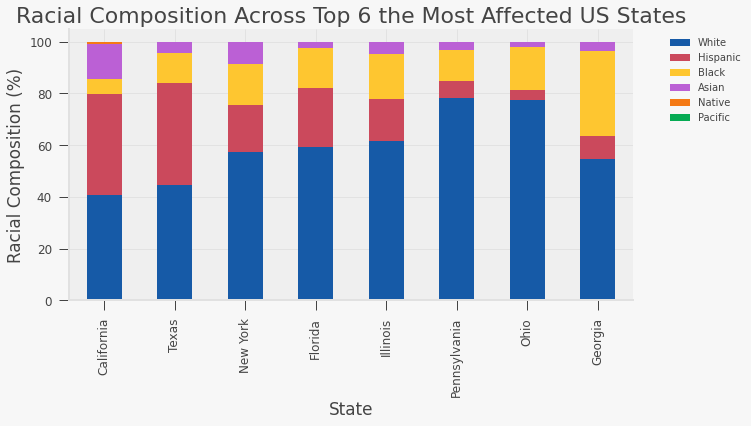

In [213]:
stacked_data = df_8.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(9,5))
plt.title("Racial Composition Across Top 6 the Most Affected US States",fontsize=22)
plt.xlabel("State")
plt.ylabel("Racial Composition (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

### Observation:
From the stacked bar chart above, it shows that in general, white group contributes to the majority of the population of each states, followed by Hispanic and Black. As these six states are large in resident population, we can also see a higher racial diversity among California, Texas, New York, and Florida. 

## 3.5 Figure 5: US State-Level Gini Index

### THE MESSAGE:
We want to show that income inequality and racial diversity are positively correlated. To illustrate this relationship, we use use a horizontal bar chart and set the independent variable to be US States and the dependent variable to be the 2010 US State-level Gini Index.

By using a horizontal bar chart, we examined the Gini Index as a measure of income inequality in 50 US states.

(array([0.4 , 0.45, 0.5 ]), [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

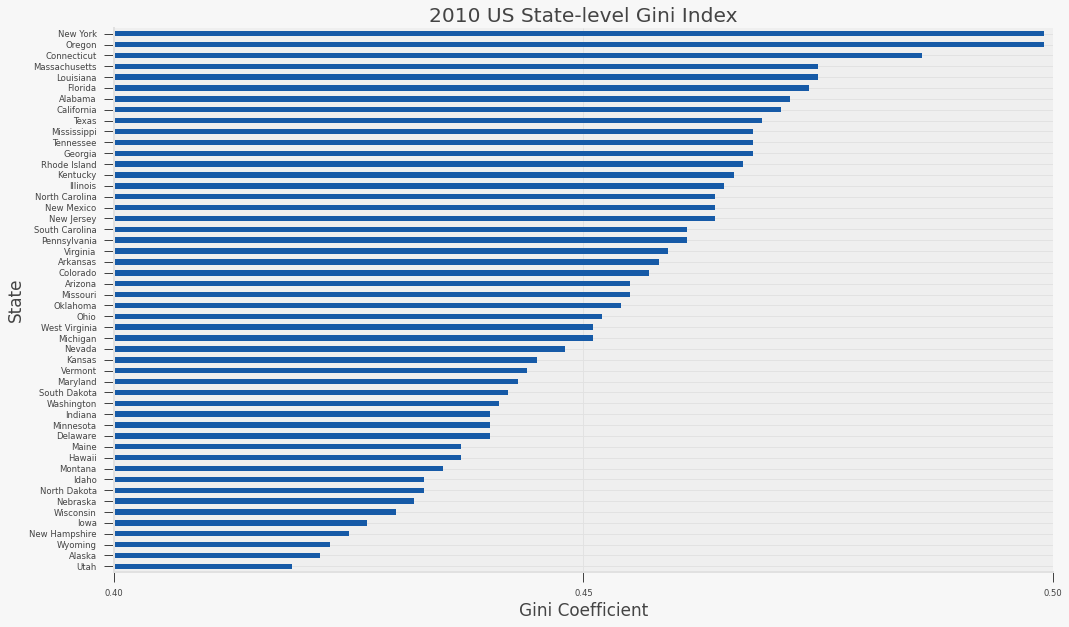

In [214]:
# Plot a horizontal bar chart, entitled "2010 US State-level Gini Index"
gini_clean
gini_clean_sorted = gini_clean.sort_values('2010 ACS Gini index',ascending=True)

gini_clean_sorted.plot(kind="barh", fontsize=4, legend = False, figsize=(15,10))
plt.title("2010 US State-level Gini Index")
plt.xlabel("Gini Coefficient")
plt.ylabel("State")
plt.xlim(0.4, 0.5)
x_ticks = [0.4,0.45,0.5]
plt.xticks(ticks=x_ticks)
plt.yticks(fontsize=8.5)
plt.xticks(fontsize=8.5)

### Observation:
From the bar chart above, we can see the Gini index of 50 US states in a descending order. The Gini coefficient can theoretically range from 0 meaning a complete equality to 1 indicating to a complete inequality. Overall, the range of Gini Index of 50 US states is relatively small, ranging from 0.42 to 0.49. Specifically, this graph highlights that states such as New York and Oregon have the highest Gini Index around 0.49, which is considered as high degree of income inequality. In contrast, states like Wyoming, Alaska, Utah have the lowest Gini Index among 50 US states around 0.43. Additionally, states that are highly racially diversed like New York, California, and Texas are also in the upper ranking of the Gini Index. In this case, we can infer that racial disparity may be related with income inequality.  

## 3.6 Figure 6: The Unadjusted Association Between the State-Level Gini Index and the Number of COVID-19 Deaths

### THE MESSAGE:
We aim to highlight that the number of deaths casued by COVID-19 of each state is positively correlated with the income inequality of that state. To highlight this relationship, we incorporate scatterplot with a regression line and set the independent variable to be the 2010 ACS State-level Gini Index while the dependent variable id the Total number of COVID-19dDeaths (Log-transformed).

Here, we performed simple correlation analyses between the state-level Gini index and the number of cases and COVID-19 deaths per 100,000 population.

In [215]:
gini_clean
deaths_clean

death_num = deaths_clean["Total COVID-19 Deaths"]
df = pd.concat([death_num,gini_clean], axis = 1)

,2010 ACS Gini index,Number_of_Deaths_log_transformed
2010 ACS Gini index,1.000000,0.647607
Number_of_Deaths_log_transformed,0.647607,1.000000


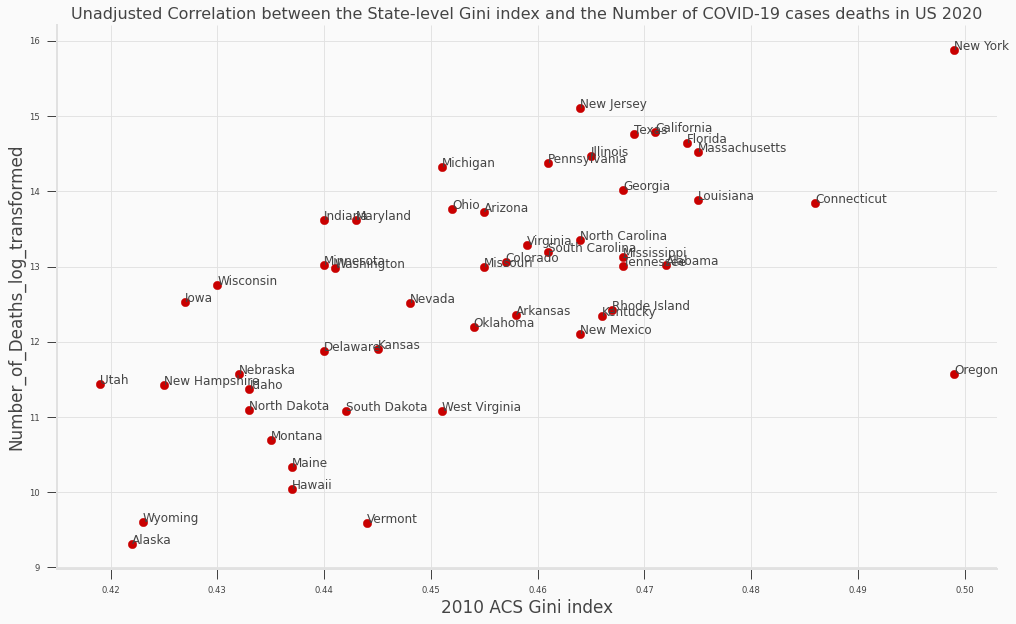

In [216]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df["Number_of_Deaths_log_transformed"] = np.log(df['Total COVID-19 Deaths'])
x = "2010 ACS Gini index"
y = "Number_of_Deaths_log_transformed"
fig, ax = plt.subplots()

df.plot(kind="scatter", x="2010 ACS Gini index", y= "Number_of_Deaths_log_transformed", \
        ax=ax, s=70, color="#c90000", figsize=(15,10), fontsize=6)

# Add annotations
for (i, row) in df.iterrows():
    state = row.name

    offset = (0, 0)
    ax.annotate(
        state, xy=(row["2010 ACS Gini index"], row["Number_of_Deaths_log_transformed"]),
        xytext=offset, textcoords="offset points", fontsize=12)

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Unadjusted Correlation between the State-level Gini index and the Number of COVID-19 cases deaths in US 2020", fontsize=16)
plt.yticks(fontsize=8.5)
plt.xticks(fontsize=8.5)

df_test = df.drop(['Total COVID-19 Deaths'], axis=1)
df_test = df_test.corr()
df_test

### Observation:
We observed positive correlations between the Gini index and the number of cases and deaths due to COVID-19 (correlation coefficient = 0.647607). Meanwhile, a correlation coefficient of 0.7 indicates that a significant and positive relationship exists between the state-level Gini index and the number of cases and COVID-19 deaths. For comparison, incorperating with previous analysis, states with higher income inequality like New York, Connecticut, and California experienced a higher mortality due to COVID-19, while states with lower income inequality like Alaska, Wyoming, Utah experienced a higher mortality.

---

# Summary Statistics Part 2 : Project 2

### THE MAIN MESSAGE:
Income inequality and state-level racial composition together may explain the reason why some parts of the USA were hit harder by the COVID-19 pandemic than others, as the COVID-19 mortality across 50 US states cannot be explained by using only one factor.

## 4.1 Figure 7. Comfirmed COVID-19 Cases Worldwide and COVID-19 Caused Mortality Worldwide (Data Last Updated on July 28, 2020)

#### Creating a Visualization:
First, we plotting a world map. Second, plotting different country and region borders on the world map. Third, plotting the number of comfirmed COVID-19 cases using geopandas on a world map updated on July 28, 2020. Fourth, using a proper color scheme to shade countries to reflect the number of comfirmed COVID-19 cases and number of deaths. Finally. creating a hovering feature on the detailed country-wise data on the map.

In [217]:
country_wise = pd.read_csv('country_wise_latest.csv')
country_wise = country_wise.replace('', np.nan).fillna(0)

In [218]:
def plot_map1(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country/Region", locationmode='country names', 
                  color=col, hover_name="Country/Region", 
                  title="COVID-19 Mortality Worldwide (updated on July 28, 2020)", hover_data=[col], color_continuous_scale=pal)
    fig.show()

def plot_map2(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country/Region", locationmode='country names', 
                  color=col, hover_name="Country/Region", 
                  title="Comfirmed COVID-19 Cases Worldwide, (updated on July 28, 2020)", hover_data=[col], color_continuous_scale=pal)
    fig.show()

In [219]:
plot_map2(country_wise, 'Confirmed', 'matter')
plot_map1(country_wise, 'Deaths', 'matter')

### Observation:
First, regarding the map showing the number of comfirmed COVID-19 cases around the world, we can observe that the US is shaded in dark blue, which indicates that most comfirmed COVID-19 cases care found in the US reaching almost 4.3 million of comfirmed cases in July 2020 and followed by Brazil, India, and Russia. Similarly, the second map highlights that the US has suffered the most number of deaths related to COVID-19 during the first wave of the COVID-19 pandemic. As showing on the map, we can see that countries like Brazil, India, and Mexico also suffered a very high mortality rate after the US. Ultimately, having a large number of COVID-19 cases has suggested that the United States would be a resonable and appropriate pool to collect research data from.


## 4.2 Figure 8. 2020 US COVID-19 Deaths Heat Map

We want to present a heat map illustrating the number of COVID-19 deaths across 50 US states in 2020.

#### Creating a Visualization:
First, we want to plotting a map of the United States. Second, plotting state borders on the map. Third, plotting the number of deaths using geopandas on a map of the US. The fourth step is using a proper color scheme to shade states to reflect the number of COVID-19 mortality. Finally, creating a hovering feature on the detailed state-wide data on the map.

In [220]:
usa_df = pd.read_csv('usa_county_wise.csv')
usa_latest = usa_df[usa_df['Date'] == max(usa_df['Date'])]
usa_grouped = usa_latest.groupby('Province_State')['Confirmed', 'Deaths'].sum().reset_index()

us_code = {'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 
    'California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE', 'District of Columbia': 'DC', 
    'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME',
    'Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS',
    'Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

usa_grouped['Code'] = usa_grouped['Province_State'].map(us_code)

fig = px.choropleth(usa_grouped, color='Deaths', locations='Code', locationmode="USA-states", 
                    scope="usa", color_continuous_scale="RdGy", title='Number of Deaths in US (July 28, 2020)')
fig

### Observation：
Zooming in the map with a worldwide coverage to the most affected country, which is the United States. We learn that New York state suffered from the highest number of COVID-19 deaths according to the data updated on July 28, 2020. While New York state almost hit a 32 thousand of deaths, states like Illinois, California, and Massachusetts also experienced a high number of COVID-19 deaths. Incorporating Figure 4, we see a link that these top states with the most number of COVID-19 deaths also have very diverse racial compositions and high Gini Indexes. Thus, this may suggest a positive effect of racial composition and income inequality on the US COVID-19 mortality rates.

## 4.3 Figure 9. Percentage of White Population Across 50 States

We want to show that the geographical distribution of white population across 50 US states. Incorporating with Figure 8, we can learn that there's no significant relationship can be observed between the COVID-19 deaths and the racial group of white people.

#### Visualization:
First, we need to merge the US state geographic data with the demographic statistics across 50 states on the same geographic level. Second, we wan to plot the map of the US indicating the percentage that white population accounts for out of the total population of each state. The final step is selecting an appropriate color scale to highlight the white population proportion.

In [221]:
usa_df = pd.read_csv('usa_county_wise.csv')
usa_df.rename(columns=({ 'Province_State': 'state'}), inplace=True,)
demog_df = pd.read_csv('us_county_demographics.csv')
gbdemo = demog_df.groupby('state')['WHITE_POP_PERC','BLACK_POP_PERC', 'ASIAN_POP_PERC'].mean().reset_index()
usa_grouped.rename(columns=({ 'Province_State': 'state'}), inplace=True,)


In [222]:
merge_df = pd.merge(usa_grouped, gbdemo, how='left', on=['state']).dropna()

In [223]:
us_code = {'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 
    'California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE', 'District of Columbia': 'DC', 
    'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME',
    'Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS',
    'Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

usa_grouped['Code'] = usa_grouped['state'].map(us_code)

In [224]:
fig1 = px.choropleth(merge_df, color='WHITE_POP_PERC', locations='Code', locationmode="USA-states", 
                    scope="usa", title='Percentage of White Population Across 50 States', color_continuous_scale="viridis")
fig1

### Observation:
The scale on the right indicates that states that are shaded in lighter yellow have a higher percentage of white population, so states like Idaho and Wyoming has a higher proportion of white people. Incorporating with Figure 8,  we can hardly observe any significant association between US states with a higher proportion of white population and states with higher COVID-19 mortality, or to further infer any casual relationship between the COVID-19 deaths and a specific race such as the white population on a state level.

## 4.4 Figure 10. Percentage of Black Population Across 50 States

We want to create a map of the US showing the percentage of Black population in each states. By comparing with Figure 8 side by side, unfortunately, we cannot observe a direct relationship saying that black people experienced a higher death rate related to COVID-19.
#### Visualization:
First, we need to merge the US state geographic data with the demographic statistics across 50 states on the same geographic level. Second, we want to plot the map of the US indicating the percentage that black population accounts for out of the total population of each state. Finally, selecting an appropriate color scale to highlight the black population proportion.

In [225]:
fig2 = px.choropleth(merge_df, color='BLACK_POP_PERC', locations='Code', locationmode="USA-states", 
                    scope="usa", title='Percentage of Black Population Across 50 States', color_continuous_scale="viridis")
fig2

### Observation:
The scale on the right indicates that states that are shaded in light yellow have a higher percentage of black population, while states in darker blue have a lower proportion of black people. Thus, states located near the southeast coast like Missouri, it has the highest proportion of black people. Incorperating Figure 8, we can see that states with a lower black population which are shaded in dark blue correspond to states with lower COVID-19 mortality rate that are shaded in dark red of Figure 8. However, we still cannot explicitly conclude that states with higher black population would experience a higher death rate or black people are more vulnerable to the Coronavirus. Thus, there might be a slightly positive effect of racial compsition on the number of COVID-19 mortality in the US, but the effect is not significant enough to allow us to make a casual inference about this phenomenon.

---

# Summary Statistics Part 3 : Project 3

## 5.1 Methods:

### Relevant Data Source that Helps with Explaining the Main Message #1:

From previous analysis, we have spotted an important lurking variable that should have been included in order to dig deeper to the effect of demographic and socio-economic situation on the COVID-19 mortality rates in the US. While the main question of this research paper is to find the effect of racial composition and income inequalty on US COVID-19 mortality rates, human morbility which influences U.S. population distribution and urbanlization. To achieve this, we would like to use Google Geolocation API to meaure individual morbility on a state level. The Geolocation API returns a location and accuracy radius based on information about cell towers and WiFi nodes that the mobile client can detect. This data would be able to provide us with an important aspect to map out the human movement during the COVID-19 pandemic in the U.S.

Here is the address where we can make Geolocation requests and pull data from the cloud. https://www.googleapis.com/geolocation/v1/geolocate?key=YOUR_API_KEY
   (Notes: Geolocation API Key requires credential screening and charges additional fees to access the data.)
   
In order to cooperate this Google Geolocation data to answer my research question, we would merge the data based on the same geographical level, using a U.S. state level. After calculating the total frequency of changes in locations across individual mobile user, then we merge this acquired data with the original U.S. state-level demographics dataset on the column "State" and limit the time frame in the year 2020. Finally, we create a visualization to map  the human mobility on a state level in the year of 2020 using a U.S. map. Most importantly, the result of this Geolocation data and comparing it with the US COVID-19 moratlity rate would factor in the dynamics and help to explain the possible reason of seeing the weak positive effect of the demographic factor, racial composition on the number of US COVID-19 mortality rates. 

To scrape the US morbility data, we do not need to run the program over time since we are interested in the year of 2020, which is considered as historical data. However, acquiring data from the Google Geolocation API has many challenges especially for individual users. Google Geolocation API is not a completely open-access resource, as accessing this resource requires credential screening and additional access fees. Additionally, it might lead to human rights abuses if they are not equipped with effective safeguards to protect privacy. In the future, we would need to learn more advanced knowledge on how to use this kind of data resources with restricted access and web scrapping in order to do a HTML-based scraping or an API-based scraping. In particular, it is quite complicated to obtain the data measuring the morbility of human. In this case, we would like to use Nitrogen Dioxide, which is primarily emitted from the burning of fossil fuels for transportation and power generation, can be used as an indicator of changes in human activity. may play an important role in increasing susceptibility to severe outcomes of COVID-19. Thus, we also want use datasets such as the US State-Level Annual Average Concentrations of Nitrogen Dioxide and the Average Monthly Temperature acorss 50 US States to explore the possibility of human morbility to explain the increase in mortality of US COVID-19 cases.

### Relevant Data that Helps with Explaining the Main Message #2:
In response to the COVID-19 pandemic in the United States, state, territorial, tribal, and municipal governments have issued a number of declarations of emergency, as well as closures of schools and public gathering places, lockdowns, and other measures aimed at slowing the spread of COVID-19. We want to look at how U.S. state and local government responsed to the COVID-19 pandemic and how these regulations have an effect on the U.S. COVID-19 mortality. Including the data of state-level regulations in our paper would help to bring a more hollistic understanding of how government policy has played a role in controlling the COVID-19 deaths across the 50 states in the U.S. 

Here is the address where we can scrape the data from. https://en.wikipedia.org/wiki/U.S._state_and_local_government_responses_to_the_COVID-19_pandemic#State-level_regulations

In order to cooperate this data that collects government intial pandemic responses to answer my research question, we would like to merge the data based on the same geographical level, using a U.S. state level map. Specifically out of the six main regulations, we decide to focus on the dates when state governemnts imposed stay-at-home order. Because of each state initiated their own policy responses to the pandemic, it resulted in significant variability across different states. In order to seek a the effect of the racial demographic situation in each state on the number of COVID-19 mortality rates, we would like to zoom in to particularly look at the states with the most minority groups, and compare it with the timing of the stay-at-home order. If we can observe that the US state governments' initial COVID-19 responses especially for the states with higher racial diversity had an impact on the number of COVID-19 deaths in each states, we would conclude that there is an effect of racial composition on the US mortality rates.

To scrape the US state governments' intial pandemic responses, we do not need to run the program over time since we want to collect the data that has taken place in the past. This data has already been computed into a well-structured table. Thus, we are able to scrape this webstie that we found and use a map to visualize the relationship between the timing of stay-at-home order and the COVID-19 deaths among different states.

## 5.2 Web Scraping - Wikipedia HTTP

Install packages and libraries.

In [226]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Request the URL: requests.get(the_URL)

In [153]:
web_url = 'https://en.wikipedia.org/wiki/U.S._state_and_local_government_responses_to_the_COVID-19_pandemic#State-level_regulations'
response = requests.get(web_url)

Get the Soup object:

In [197]:
# soup_object = BeautifulSoup(response.content)
# soup_object

Find the relevant tags: 

In [155]:
data_table = soup_object.find_all("table", "wikitable sortable")[0]

Find the values:

In [156]:
all_values = data_table.find_all('tr')

Write a for-loop and put the data into a dataframe structure

In [157]:
state_response = pd.DataFrame(columns = ['State', "Stay-at-home order"]) # Create an empty dataframe
ix = 0 # Initialise index to zero

for row in all_values[2:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    states = row.find_all('th') # Extract all elements with tag <th>
    # Pick only the text part from the <td> and <th> tag
    state = states[0].text.strip()
    stay_at_home_order = values[1].text.strip()
   
    state_response.loc[ix] = [state, stay_at_home_order] # Store it in the dataframe as a row
    ix += 1
    
# Print the first 10 rows of the dataframe
state_response.head(10)

,State,Stay-at-home order
0,Alabama,April 4
1,Alaska,March 28
2,American Samoa,No
3,Arizona,March 31
4,Arkansas,No
5,California (government response),March 19
6,Colorado,March 26
7,Connecticut,March 23
8,Delaware,March 24
9,District of Columbia,March 30


Save state_response.to_csv

In [158]:
state_response.to_csv('List of US State Government Stay at Home Order.csv', 
                     index=False)

## 5.3 Data Cleaning & Visualization

Splitting the values in the "Stay-at-home order" column into two columns.

In [159]:
state_response['Stay-at-home order'].str.split(expand=True,)
state_response[['Month','Date']] = state_response['Stay-at-home order'].str.split(expand=True,).loc[:,[0,1]]

Filtering and grouping the dates of when each state implemented a stay-at-home order using five main categories.

In [160]:
filter_mar_22 = state_response[(state_response['Month'].str.contains("March")) & (state_response['Date'] <= '22')]

# us_state_response["Stay at Home Order"] = pd.NaT
before_March_22 = ["Came into effect before March 22","Came into effect before March 22", "Came into effect before March 22",
                   "Came into effect before March 22","Came into effect before March 22"]
filter_mar_22["Stay at Home Order"] = before_March_22

In [161]:
filter_mar_31 = state_response[(state_response['Month'].str.contains("March")) & (state_response['Date'] <= '31') & (state_response['Date'] > '22')]
before_March_31 = ["Came into effect before March 31","Came into effect before March 31", 
                   "Came into effect before March 31", "Came into effect before March 31",
                   "Came into effect before March 31", "Came into effect before March 31","Came into effect before March 31", 
                   "Came into effect before March 31", "Came into effect before March 31",
                   "Came into effect before March 31", "Came into effect before March 31","Came into effect before March 31", 
                   "Came into effect before March 31", "Came into effect before March 31",
                   "Came into effect before March 31", "Came into effect before March 31","Came into effect before March 31", 
                   "Came into effect before March 31", "Came into effect before March 31",
                   "Came into effect before March 31", "Came into effect before March 31","Came into effect before March 31", 
                   "Came into effect before March 31", "Came into effect before March 31",
                   "Came into effect before March 31", "Came into effect before March 31","Came into effect before March 31", 
                   "Came into effect before March 31", "Came into effect before March 31"]
filter_mar_31["Stay at Home Order"] = before_March_31

In [162]:
filter_april_5 = state_response[(state_response['Month'].str.contains("April")) & (state_response['Date'] <= '5')]

before_april_5 = ["Came into effect before April 5","Came into effect before April 5", "Came into effect before April 5",
                  "Came into effect before April 5","Came into effect before April 5", "Came into effect before April 5","Came into effect before April 5", "Came into effect before April 5",
                  "Came into effect before April 5","Came into effect before April 5"]
filter_april_5["Stay at Home Order"] = before_april_5

In [163]:
filter_april_12 = state_response[(state_response['Month'].str.contains("April")) & (state_response['Date'] <= '12')]

before_april_12 = ["Came into effect before April 12","Came into effect before April 12"]
filter_april_12["Stay at Home Order"] = before_april_12

In [164]:
filter_no = state_response[(state_response['Stay-at-home order'].str.contains("No"))]
filter_no
no = ["No order ever issued", "No order ever issued", "No order ever issued","No order ever issued",
     "No order ever issued", "No order ever issued", "No order ever issued"]
filter_no["Stay at Home Order"] = no

Concating these five tables vertically to merge then together on state, and compute the table, named sorted_us_response.

In [165]:
sorted_us_response = pd.concat([filter_mar_22, filter_mar_31, filter_april_5, 
                                filter_april_12, filter_no], axis= 0)
sorted_us_response.head()

,State,Stay-at-home order,Month,Date,Stay at Home Order
5,California (government response),March 19,March,19,Came into effect before March 22
15,Illinois,March 21,March,21,Came into effect before March 22
32,New Jersey,March 21,March,21,Came into effect before March 22
34,New York (government response),March 22,March,22,Came into effect before March 22
42,Puerto Rico,March 15,March,15,Came into effect before March 22


## 5.4 Figure 11. US States that Have Issued a Stay-at-Home Order, 2020¶

Visualization: create a map of the United States divided into 50 states to present the time order of each state government's stay-at-home order.

In [166]:
us_state_response = pd.read_csv('List of US State Government Stay at Home Order.csv')

us_code = {'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 
    'California (government response)': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE', 'District of Columbia': 'DC', 
    'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME',
    'Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS',
    'Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York (government response)': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas (government response)': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

sorted_us_response['Code'] = sorted_us_response['State'].map(us_code)

fig = px.choropleth(sorted_us_response, color='Stay at Home Order', locations='Code', 
                    locationmode="USA-states", scope="usa", color_discrete_map={
                        'Came into effect before March 22': '#191970', 
                        'Came into effect before March 31': '#4169e1', 
                        'Came into effect before April 5': '#6495ed',
                        'Came into effect before April 12': '#87ceeb', 'No order ever issued': '#b0c4de'}, 
                    title='US States that have issued a stay-at-home order, 2020')
fig 

### Observation: 
This map provides a way to compare government responses to COVID-19 across U.S. states during the year 2020.
We have observed that responses differ significantly between states in the United States. The lack of a clear national strategy and the federal government, as well as increased political controversy over viral response measures, has resulted in a diversified landscape of policies across the country. Firstly, although COVID-19 reached to most states around the same time, in early March. For example, California, New York, and Illinois we fast-movers relative to the spread of the disease. States with early outbreaks, like Texas, Florida, and Minnesota adopted measure much later, relative to the spread of the disease. And a few states like Montana we fast-movers relative to the spread of the disease. States with early outbreaks, like Pennsylvania waited a
month or longer before implementing acticvity restrictions. In general, it also seems that government responses were spread over a broader period. Coronavirus cases and mortality were higher in states with early restricons. However, states that are high in minority groups and income inequality seems to have a early response to the pandemic to reduce the chance of further spread of the virus.

# Regression Results

In this research, we wish to determine whether or not differences in income inequality and racial compositions across states can help to explain U.S. COVID-19 mortality. How do we measure institutional differences and economic outcomes?
In this paper,
- Economic outcomes are proxied by the total number of deaths in the United States during 2020 which is the early phrase of the COVID-19 pandemic, and these data are retrived from American Community Survey and Johns Hopkins University's COVID-19 Dashboard.
- Institutional differences are proxied by Gini Index and racial diversity  against government Health measured on average over the year of 2020, constructed from federal data.

In [167]:
# !pip install linearmodels

In [168]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

In [169]:
df["Number_of_Deaths_log_transformed"] = np.log(df['Total COVID-19 Deaths'])
x = "2010 ACS Gini index"
y = "Number_of_Deaths_log_transformed"

## 6.1 Figure 12. Scatterplot between 2010 ACG US Gini Index and Log Number of COVID-19 Deaths

Here, we want to generate a scatterplot to see whether any obvious relationship exists between Gini Index of each U.S. states and the number of deaths reported due to COVID-19. To achieve this, we need to set Gini Index as the independent variable while the number of deaths to be the dependent variable.

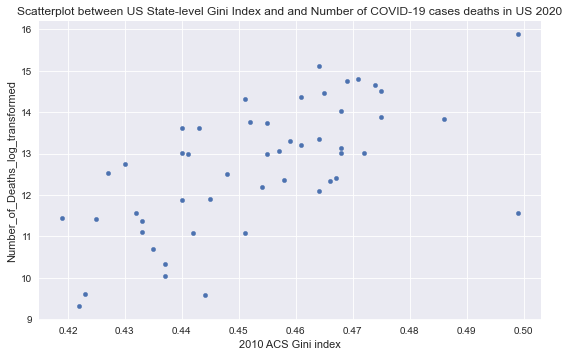

In [170]:
plt.style.use('seaborn')

df.plot(x = "2010 ACS Gini index", y = "Number_of_Deaths_log_transformed", kind='scatter', 
       title = "Scatterplot between US State-level Gini Index and and Number of COVID-19 cases deaths in US 2020")
plt.show()

#### Observation:
This plot shows a quite strong positive relationship between income inequality measured in Gini Index on a scale from 0 to 1 and log number of deaths on state level. Specifically, if higher Gini Index against COVID-19 deaths is a measure of income inequality across states , then higher level of income inequality (with a Gini Index closer to one) appear to be positively correlated with U.S. death rate due to COVID-19. Given this plot, choosing a linear model to describe this relationship
seems like a reasonable assumption.

We can write our model as

$$
{logdeaths}_i = \beta_0 + \beta_1 {gini}_i + u_i
$$

where:

- $ \beta_0 $ is the intercept of the linear trend line on the
  y-axis  
- $ \beta_1 $ is the slope of the linear trend line, representing
  the *marginal effect* of income inequality against risk on log COVID-19 mortality
- $ u_i $ is a random error term (deviations of observations from
  the linear trend due to factors not included in the model)  


## 6.2 Figure 13. OLS Relationship between 2010 ACG US Gini Index and Log Number of COVID-19 Deaths

In [171]:
df.reset_index()
us_code = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 
    'California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE', 
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME',
    'Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS',
    'Missouri': 'MO','Montana': 'MT','Nevada': 'NV','New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}
us_code2 = pd. DataFrame.from_dict(us_code, orient = 'index')
us_code2.rename_axis('State', inplace=True)
us_code2.columns = ['Code']
us_code2 = us_code2.reset_index()
gini_SLR = pd.merge(df, us_code2, on= "State" , how= "inner")

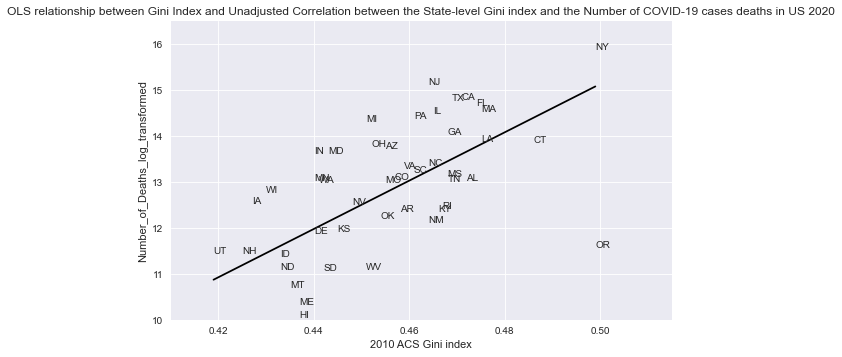

In [172]:
# Dropping NA's is required to use numpy's polyfit
gini_SLR = gini_SLR.dropna(subset=['Total COVID-19 Deaths'])

x = gini_SLR["2010 ACS Gini index"]
y = gini_SLR["Number_of_Deaths_log_transformed"]
labels = gini_SLR['Code']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(x, y, marker='')

for i, label in enumerate(labels):
    ax.annotate(label, (x.iloc[i], y.iloc[i])) #set the coordinates of the labels


# Fit a linear trend line
ax.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
         color='black')

ax.set_ylim([10,16.5])
ax.set_xlim([0.41,0.515])
ax.set_xlabel('2010 ACS Gini index')
ax.set_ylabel('Number_of_Deaths_log_transformed')
ax.set_title("OLS relationship between Gini Index and Unadjusted Correlation between the State-level Gini index and the Number of COVID-19 cases deaths in US 2020")
plt.show()

#### Observation:
This OLS line suggests a linear relationship relationship between income inequality measured in Gini Index on a scale from 0 to 1 and log number of deaths on state level. Using economic intuition to understand this, as the gap between wealth becomes larger, the rich would have moneny to afford public health care while the poor has limited access to medical resources. Thus, states with a higher poverty rate are less likely to provide an ideal and accessible medication to people from all classes. Due to the limited access to public health care, those states would suffer from a more serious mortality rate than states with higher average houselod incomes. Specifically, if we shift our focus to New York (NY) on Figure 13, New York is rated the highest Gini Index among 50 US states while it also has the highest mortality rate during the early phrase of the COVID-19 outbreak. However, Oregon here is observed to be an outlier as its mortality was even lower than the national average. According to US local news, it has proven that the surprisingly low mortality rate was due to entry error. Willamette Week News stated, "the state says a technical problem resulted in underreporting, mostly between May and August of this year"(Monahan, 2021). Thus, we will drop the Oregon from the dataset in following steps to avoid false information.




## 6.4 Table 1. OLS Regression Results between Gini Index and Number of Deaths

To estimate the constant term $ \beta_0 $, we need to add a column
of 1’s to our dataset (consider the equation if $ \beta_0 $ was
replaced with $ \beta_0 x_i $ and $ x_i = 1 $)

In [173]:
df['const'] = 1
df_drop_or= df.drop(['Oregon'])

Now we can construct our model in `statsmodels` using the OLS function.

In [174]:
reg1 = sm.OLS(endog=df_drop_or['Number_of_Deaths_log_transformed'], exog=df_drop_or[['const', '2010 ACS Gini index']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

So far we have simply constructed our model.

We need to use `.fit()` to obtain parameter estimates
$ \hat{\beta}_0 $ and $ \hat{\beta}_1 $

In [175]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

We now have the fitted regression model stored in `results`.

In [176]:
print(results.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Number_of_Deaths_log_transformed   R-squared:                       0.538
Model:                                          OLS   Adj. R-squared:                  0.528
Method:                               Least Squares   F-statistic:                     54.74
Date:                              Sun, 17 Apr 2022   Prob (F-statistic):           2.04e-09
Time:                                      00:56:19   Log-Likelihood:                -71.341
No. Observations:                                49   AIC:                             146.7
Df Residuals:                                    47   BIC:                             150.5
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                          coef    std err          t      P>|t|      [

From our results, we see that

- The intercept $ \hat{\beta}_0 = -15.85 $.  
- The slope $ \hat{\beta}_1 = 63.11 $.  
- The positive $ \hat{\beta}_1 $ parameter estimate implies that.
  institutional quality has a positive effect on economic outcomes, as
  we saw in the figure. However, we do need to note that the value of Gini Index ranges from 0 to 1. This huge slope is because that the Gini Index serves as the dummy variable measured on a scale from 0 to 1 indicatind different level of income inequality.
- The p-value of 0.000 for $ \hat{\beta}_1 $ implies that the
  effect of institutions on number of deaths is statistically significant (using p <
  0.05 as a rejection rule).  
- The R-squared value of 0.54 indicates that around 54% of variation
  in log number of COVID-19 deaths is explained by income inequality which is measured in Gini Index.


Using our parameter estimates, we can now write our estimated
relationship as

$$
\widehat{logpdeaths}_i = -15.85 + 63.11 \ {gini}_i
$$

This equation describes the line that best fits our data, as shown in
Figure 2.

We can use this equation to predict the level of log GDP per capita for
a value of the index of expropriation protection.

For example, for a country with an Gini index value of 0.45 (the approximate average for
the dataset), we find that the state predicted level of log number of deaths
in 2020 is 12.55.

## 6.5 Table 2. OLS Regression Results between log_white population and number of deaths

In [177]:
agg_df
agg_df['log_White'] = np.log10(agg_df['White'])
agg_df['log_Black'] = np.log10(agg_df['Black'])
agg_df['log_Poverty'] = np.log10(agg_df['Poverty'])
agg_df['log_Unemployment'] = np.log10(agg_df['Unemployment'])
agg_df['log_Employment'] = np.log10(agg_df['Employed'])
agg_df['Employment Rate'] = agg_df['Employed']/agg_df['TotalPop']
agg_df.head()

,TractId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,PublicWork,SelfEmployed,FamilyWork,Unemployment,log_White,log_Black,log_Poverty,log_Unemployment,log_Employment,Employment Rate
State,,,,,,,,,,,,,,,,,,,,,
Alabama,1270936252385,4850771,2350806,2499965,4524.0,72091.3,37170.5,531.6,1262.6,33.8,...,18161.0,6083.1,239.6,10165.6,4.857883,4.570198,4.379766,4.007133,6.312919,0.423749
Alaska,351430086585,738565,386319,352246,1036.2,9896.8,446.2,2837.5,938.1,182.4,...,4559.1,1175.9,35.6,1435.7,3.995495,2.649530,3.265855,3.157064,5.549058,0.479369
Arizona,6126989227658,6809946,3385055,3424891,45584.9,85641.3,5855.7,6683.3,4505.7,261.0,...,22220.5,9676.5,250.8,11511.6,4.932683,3.767579,4.424204,4.061136,6.470394,0.433761
Arkansas,3484080853747,2977944,1461651,1516293,4418.9,48141.6,13162.0,367.4,818.6,103.2,...,11189.5,4319.0,135.3,4822.2,4.682521,4.119322,4.126696,3.683245,6.106033,0.428664
California,48784308442329,38982847,19366579,19616268,302436.7,315375.1,44892.6,3313.3,107156.8,2759.2,...,109397.2,67760.9,1452.9,62920.2,5.498827,4.652175,5.090177,4.798790,7.255126,0.461585


In [178]:
# Only select columns needed for following regressions
df_2_selected = agg_df[['log_White','log_Black','log_Poverty','log_Unemployment', 'Employment Rate', 'log_Employment']]

# Merge log_deaths data with the selected data and create a new datadrame df2 to store it.
df2 = pd.merge(df, df_2_selected, left_index=True, right_index=True)
df2.head()


,Total COVID-19 Deaths,2010 ACS Gini index,Number_of_Deaths_log_transformed,const,log_White,log_Black,log_Poverty,log_Unemployment,Employment Rate,log_Employment
State,,,,,,,,,,
Alabama,453619,0.472,13.025013,1,4.857883,4.570198,4.379766,4.007133,0.423749,6.312919
Alaska,11056,0.422,9.310729,1,3.995495,2.649530,3.265855,3.157064,0.479369,5.549058
Arizona,916725,0.455,13.728563,1,4.932683,3.767579,4.424204,4.061136,0.433761,6.470394
Arkansas,231873,0.458,12.353945,1,4.682521,4.119322,4.126696,3.683245,0.428664,6.106033
California,2662978,0.471,14.794956,1,5.498827,4.652175,5.090177,4.798790,0.461585,7.255126


In [179]:
df2['const'] = 1


In [180]:
reg2 = sm.OLS(endog=df2['Number_of_Deaths_log_transformed'], exog=df2[['const', 'log_White']], \
    missing='drop')
type(reg2)

statsmodels.regression.linear_model.OLS

In [181]:
results = reg2.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [182]:
print(results.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Number_of_Deaths_log_transformed   R-squared:                       0.741
Model:                                          OLS   Adj. R-squared:                  0.736
Method:                               Least Squares   F-statistic:                     137.3
Date:                              Sun, 17 Apr 2022   Prob (F-statistic):           1.10e-15
Time:                                      00:56:21   Log-Likelihood:                -58.100
No. Observations:                                50   AIC:                             120.2
Df Residuals:                                    48   BIC:                             124.0
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

## 6.6 Table 3. Multiple Linear Regression Results

We can extend our bivariate regression model to a **multivariate regression model** by adding in other factors that may affect $ logpdeaths $.

In this research, we consider other explanatory factors such as:

- the effect of **white polulation** on US state-level mortality; 
- the effect of **black polulation** on US state-level mortality; 
- the effect of **unemployment polulation** on US state-level mortality;
- differences in income inequality measured in Gini Index; controlled for with the use of
  **Gini** dummies  


In [183]:
# Add constant term to dataset
df2['const'] = 1

# Create lists of variables to be used in each regression
X1 = ['const', '2010 ACS Gini index']
X2 = ['const', 'log_White']
X3 = ['const', 'log_White', 'log_Black']
X4 = ['const', 'log_White', 'log_Black', 'log_Poverty', '2010 ACS Gini index']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(df2['Number_of_Deaths_log_transformed'], df2[X1], missing='drop').fit()
reg2 = sm.OLS(df2['Number_of_Deaths_log_transformed'], df2[X2], missing='drop').fit()
reg3 = sm.OLS(df2['Number_of_Deaths_log_transformed'], df2[X3], missing='drop').fit()
reg4 = sm.OLS(df2['Number_of_Deaths_log_transformed'], df2[X4], missing='drop').fit()

In [184]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

In [185]:
results_table = summary_col(results=[reg2,reg3,reg4],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3'],
                            info_dict=info_dict,
                            regressor_order=['log_White',
                                             'log_Black',
                                             'log_Poverty',
                                             'gini'])

results_table.add_title('Table 3 - OLS Regressions')

print(results_table)

         Table 3 - OLS Regressions
                    Model 1 Model 2 Model 3
-------------------------------------------
log_White           3.23*** 1.56*** 1.54** 
                    (0.28)  (0.40)  (0.70) 
log_Black                   0.96*** 0.78***
                            (0.19)  (0.24) 
log_Poverty                         0.01   
                                    (0.77) 
2010 ACS Gini index                 13.98**
                                    (6.30) 
const               -2.79** 1.56    -4.01  
                    (1.32)  (1.39)  (2.90) 
R-squared           0.74    0.83    0.85   
R-squared Adj.      0.74    0.82    0.84   
R-squared           0.74    0.83    0.85   
No. observations    50      50      50     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### Observation:
We compute a multiple linear regression model on four explanatory variables, including 'log_White', 'log_Black', 'log_Unemployment',and '2010 ACS Gini index' as a categorical variable measured on a scale from 0 to 1. The reason that we choose to run these regressions with these four explanatory variables is firstly because these variables are highly related with our research questions and by completing a log transformation on each of them allows us to generate a model to predict COVID-19 mortality using these four factors. Further, each regression model controlls for different variables. As for Model 3, it allows us to access mortality by showing after controlling for white population, black population, 2010 US Gini Index, on average, each additional percent of poverty rate would result in approxiatmely 0.01 percent increase in COVID-19 mortality nation-wide. However, we do need to note that there are zero stars on the log_poverty meaning that this variable is not statistically significant in Model 3.

In addition, by comparing $R^2$ across these three regression models, we can see that multi-linear regressions that are controll for other variables yield a higher $R^2$ around 0.85 compared to the 0.74 from a simple linear regression model (shown as Model 1). With a higher $R^2$ and adjusted $R^2$ in our multiple linear regression model, we have learned that having these four explanatory variables together has a positive effect on explaining the entire model. Thus, we can conclude that multiple linear regression allows us to assess the relationship between a particular independent variable and the result while holding all other variables constant; it also allows us to adjust for any confounding factors that have been included in the model.

Multiple linear regressions such as Model 3 would lead to a more accurate and precise understanding of the association of each individual factor with the COVID-19 mortality in the US.

## 6.7 Figure 14. IV Regression Results

In this stage, as the OLS models likely suffer from
**endogeneity** issues, resulting in biased and inconsistent model
estimates, we can use **two-stage least squares (2SLS)
regression**, which is an extension of OLS regression.

Namely, there is likely a two-way relationship between income inequality and US COVID-19 mortality:

- people who are employed and have a steady source of income may be able to afford or prefer better access to public health care.
- variables that affect income may also be correlated with
  differences in resources
- the construction of the Gini index may be biased; analysts may be biased
  towards seeing countries with higher proportion of white population having higher income and better
  health care resources.  


This method requires replacing the endogenous variable
$ {gini}_i $ with a variable that is:

1. correlated with $ {gini}_i $  
1. not correlated with the error term (ie. it should not directly affect
  the dependent variable, otherwise it would be correlated with
  $ u_i $ due to omitted variable bias)  


The new set of regressors is called an **instrument**, which aims to
remove endogeneity in our proxy of income differences.


For this IV regression analysis, we hypothesize that higher unemployment rates led to higher severity of US COVID-19 mortality, and these impacts on death numbers due to COVID-19 still persist today.

Using a scatterplot (Figure 14), we can see unemployment rate is positively correlated with state-level Gini Index, coinciding with our hypothesis and satisfying the first condition of a valid instrument.

In [186]:
df2_subset1 = pd.merge(df2, us_code2, on= "State" , how= "inner")
df2_subset1.drop([35], axis=0, inplace=True)

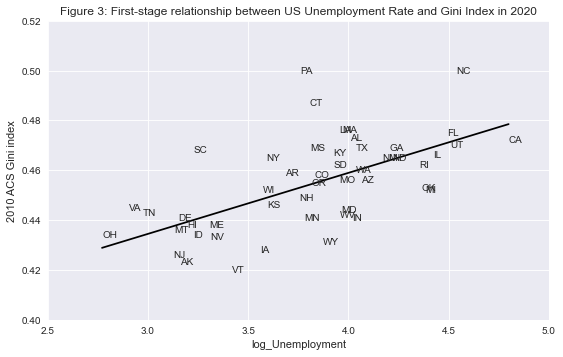

In [187]:
# Dropping NA's is required to use numpy's polyfit
df2_subset1 = df2.dropna(subset=['log_Unemployment', '2010 ACS Gini index'])

X = df2_subset1['log_Unemployment']
y = df2_subset1['2010 ACS Gini index']
# labels = df2_subset1['Code']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='')

for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

ax.set_xlim([2.5,5])
ax.set_ylim([0.4,0.52])
ax.set_xlabel('log_Unemployment')
ax.set_ylabel('2010 ACS Gini index')
ax.set_title('Figure 3: First-stage relationship between US Unemployment Rate and Gini Index in 2020')
plt.show()

## 6.7 Table 4 First-Stage Regression

**First stage**

The first stage involves regressing the endogenous variable
($ {gini}_i $) on the instrument.

The instrument is the set of all exogenous variables in our model (and
not just the variable we have replaced).

Therefore, we will estimate the first-stage regression as

$$
{gini}_i = \delta_0 + \delta_1 {logunemployment}_i + v_i
$$

In [188]:
# Add a constant variable
df2_subset1['const'] = 1

# Fit the first stage regression and print summary
results_fs = sm.OLS(df2_subset1['2010 ACS Gini index'],
                    df2_subset1[['const', 'log_Unemployment']],
                    missing='drop').fit()
print(results_fs.summary())

                             OLS Regression Results                            
Dep. Variable:     2010 ACS Gini index   R-squared:                       0.405
Model:                             OLS   Adj. R-squared:                  0.393
Method:                  Least Squares   F-statistic:                     32.69
Date:                 Sun, 17 Apr 2022   Prob (F-statistic):           6.76e-07
Time:                         00:56:22   Log-Likelihood:                 140.89
No. Observations:                   50   AIC:                            -277.8
Df Residuals:                       48   BIC:                            -274.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3610   

## 6.7 Table 5 Second-Stage Regression

**Second stage**

We need to retrieve the predicted values of $ {gini}_i $ using
`.predict()`.

We then replace the endogenous variable $ {gini}_i $ with the
predicted values $ \widehat{gini}_i $ in the original linear model.

Our second stage regression is thus

$$
{logdeaths}_i = \beta_0 + \beta_1 \widehat{gini}_i + u_i
$$

In [189]:
df2_subset1['predicted_gini'] = results_fs.predict()

results_ss = sm.OLS(df2_subset1['Number_of_Deaths_log_transformed'],
                    df2_subset1[['const', 'predicted_gini']]).fit()
print(results_ss.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Number_of_Deaths_log_transformed   R-squared:                       0.808
Model:                                          OLS   Adj. R-squared:                  0.804
Method:                               Least Squares   F-statistic:                     202.4
Date:                              Sun, 17 Apr 2022   Prob (F-statistic):           7.68e-19
Time:                                      00:56:22   Log-Likelihood:                -50.572
No. Observations:                                50   AIC:                             105.1
Df Residuals:                                    48   BIC:                             109.0
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                     coef    std err          t      P>|t|      [0.025

#### Observation:
The second-stage regression results give us an unbiased and consistent
estimate of the effect of income inequality on US COVID-19 mortality.

The result give us an $R^2$ and $Adjusted R^2$ of 0.81, which suggests a stronger positive relationship than what the OLS results indicated. Further, with a tiny P-value on the 'predicted_gini' and a large F score, we can conclude that this variable and the model is statistically significant at a 1% level.


## 6.7 Table 5 IV-2SLS Estimation Summary

In [190]:
iv = IV2SLS(dependent=df2_subset1['Number_of_Deaths_log_transformed'],
            exog=df2_subset1['const'],
            endog=df2_subset1['2010 ACS Gini index'],
            instruments=df2_subset1['log_Unemployment']).fit(cov_type='unadjusted')



print(iv.summary)

                                 IV-2SLS Estimation Summary                                 
Dep. Variable:     Number_of_Deaths_log_transformed   R-squared:                     -0.1657
Estimator:                                  IV-2SLS   Adj. R-squared:                -0.1900
No. Observations:                                50   F-statistic:                    34.669
Date:                              Sun, Apr 17 2022   P-value (F-stat)                0.0000
Time:                                      00:56:22   Distribution:                  chi2(1)
Cov. Estimator:                          unadjusted                                         
                                                                                            
                                  Parameter Estimates                                  
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------

#### Evaluation:

With this procedure of doing a '2 stages least squares', 2SLS, we do the first stage like before and then run a second stage where we replace the treatment variable by the fitted values of the 1st stage.

$$
{gini}_i = \delta_0 + \delta_1 {logunemployment}_i + v_i
$$

$$
\widehat{logpdeaths}_i = \beta_0 + \beta_1 {gini}_i + u_i
$$

$$
\widehat{logpdeaths}_i = \beta_0 + \beta_1 {[\delta_0 + \delta_1 {logunemployment}_i + v_i]}_i + u_i
$$


We have a significant result based on the IV-2SLS Estimation Summary. Those states with an additional 0.1 increase in the Gini Index measured on a scale from 0 to 1, on average, witness approximately 11% higher COVID-19 mortality. This time, the p-value of this IV regression is tiny and close to zero as before, thus it’s still pretty significant, being just 0.0000.

Given that we now have consistent and unbiased estimates, the big F test statistics indicating that the model is statistically significant overall, so we have sufficient evidence to infer from the model we have estimated that income disparity can help to explain differences in mortality rates across 50 US States during the early stage of the COVID-19 pandemic. 
However, we need to understand that IV Regression sometimes reports no R2 and returns a negative value for the model sum of squares in e(mss). Since the The $R^2$ really has no statistical meaning in the context of instrumental variables (IV) estimates, we can reduce our attention to the negative $R^2$.


## 6.8 Table 6 Regression Summary

In [191]:
import statsmodels.formula.api as smf

df2_subset1['gini'] = df2_subset1['2010 ACS Gini index']

formula1 = 'Number_of_Deaths_log_transformed~const+log_White +log_Black + log_Poverty + gini'
formula2 = 'Number_of_Deaths_log_transformed~const+log_White +log_Black + log_Poverty + gini'
formula3 = 'Number_of_Deaths_log_transformed~const+log_White +log_Black + log_Poverty + gini'

flist = [formula1, formula2, formula3]
for i in flist:
    reg = smf.ols(i, data = df2_subset1).fit()
    print(reg.summary())



                                   OLS Regression Results                                   
Dep. Variable:     Number_of_Deaths_log_transformed   R-squared:                       0.849
Model:                                          OLS   Adj. R-squared:                  0.835
Method:                               Least Squares   F-statistic:                     63.19
Date:                              Sun, 17 Apr 2022   Prob (F-statistic):           6.90e-18
Time:                                      00:56:22   Log-Likelihood:                -44.629
No. Observations:                                50   AIC:                             99.26
Df Residuals:                                    45   BIC:                             108.8
Df Model:                                         4                                         
Covariance Type:                          nonrobust                                         
                  coef    std err          t      P>|t|      [0.025   

#### Evaluation:
$Model:$

$$
\widehat{logpdeaths}_i = -2.01 + 1.54{log_White}_i + 0.78{log_Black}_i + 0.01{log_Poverty}_i + 13.98{gini}_i + u_i
$$


In these results, except for the state-level poverty rate, the relationships between white population and black population, and Gini Index across 50 states in the US are statistically significant because the p-values for these terms are less than the significance level of 0.05. The relationship between poverty rate and number of COVID-19 mortality is not statistically significant and barely meet a significance level of 0.10. Most importantly, given the large F test statistics of 63.19, which is substaintially higher than a conventional threshold of 2, we can conclude that the model this statistically significan overall.

In this model, the omitted category is the rest of population aside from white and black. After holding white population, black population, and poverty rate fixed, states with a 0,1 points increase in Gini Index, on average have an approximately 1.5% higher mortality rate during the early stage of the COVID-19 pandemic in 2020. After holding, black population, poverty rate, and Gini index fixed, states with a 1% increase in white population, on average have an approximately 1.5% higher mortality rate during the early stage of the COVID-19 pandemic in 2020.

We observed positive correlations between the Gini index and the number of deaths (correlation coefficient = 0.75; P = 0.0000) due to COVID-19 (Table. 1). After adjusting for potential confounders, we found that states with a higher Gini index experienced a larger number of deaths due to COVID-19; the Gini index was marginally associated with the number of COVID-19 cases (+ 14%; 95%CI, + 1.28% to + 27%; P > 0.032) (Table. 6).

From the IV regression models performed above, we learned that we need to be careful when making a causual inference on the relationship between the income inequality and the COVID-19 mortality in the US during the year of 2020 after conducting a IV regression analysis. Although the Gini Index appears to be a good predictor to predict the number of deaths due to COVID-19 during the early stage of the pandemic, we do need to pay attention to the large standard deviation on the gini variable in the IV regression.

# Machine Learning

In [192]:
# df2_subset1 = df2_subset1["gini"]*100
df2_subset1["gini"] = 100 * df2_subset1["gini"]

In [193]:
from sklearn import (
    linear_model, metrics, pipeline, model_selection)

X = df2_subset1# convert everything to be a float for later on
y = df2_subset1["Number_of_Deaths_log_transformed"]
for col in list(X):
    X[col] = X[col].astype(float)
X.head()

,Total COVID-19 Deaths,2010 ACS Gini index,Number_of_Deaths_log_transformed,const,log_White,log_Black,log_Poverty,log_Unemployment,Employment Rate,log_Employment,predicted_gini,gini
State,,,,,,,,,,,,
Alabama,453619.0,0.472,13.025013,1.0,4.857883,4.570198,4.379766,4.007133,0.423749,6.312919,0.459140,47.2
Alaska,11056.0,0.422,9.310729,1.0,3.995495,2.649530,3.265855,3.157064,0.479369,5.549058,0.438329,42.2
Arizona,916725.0,0.455,13.728563,1.0,4.932683,3.767579,4.424204,4.061136,0.433761,6.470394,0.460462,45.5
Arkansas,231873.0,0.458,12.353945,1.0,4.682521,4.119322,4.126696,3.683245,0.428664,6.106033,0.451211,45.8
California,2662978.0,0.471,14.794956,1.0,5.498827,4.652175,5.090177,4.798790,0.461585,7.255126,0.478521,47.1


In [194]:
from sklearn import tree
sqft_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)

In [195]:
# use the fitted tree to predict
y_pred_tree = sqft_tree.predict(X)

# find the error of prediction (MSE)
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))

Mean Squared Error: 0.04908190743954547


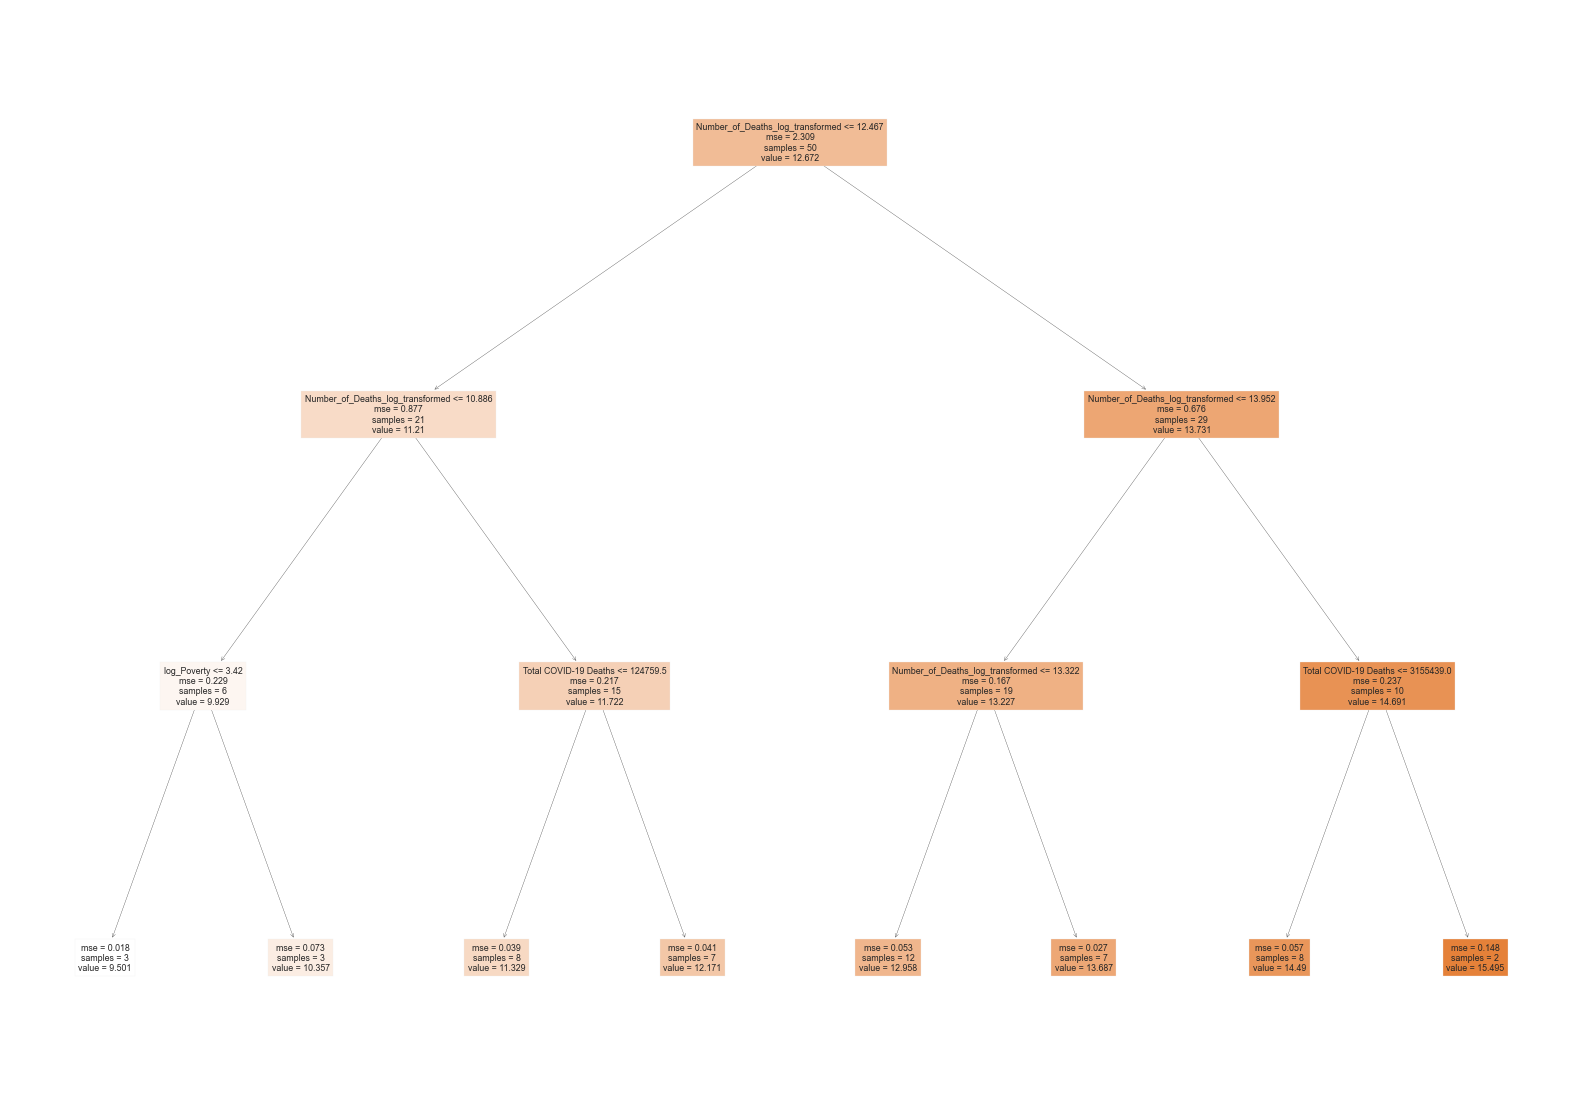

In [196]:
sqrf_fig = plt.figure(figsize=(25,20))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True)

#### Observation:
There are fifteen nodes in our regression tree. We can use the final pruned tree to predict a given state’s COVID-19 mortality based on their Gini Index, white population, black population. For example, a US state that has a Gini Index of 0.49 and 4.7 log_white population, has a predicted deaths due to COVID-19 of 0.499 (log-transformed). More specifically, this illustartes that a US state with higher level of Gini Index would more likely to witness a higher number of predicted deaths during the early stage of COVID-19 pandemic.

By comparing the results from running a regression with our results from running a regression tree, we have found that most of the undesired data is filtered outlier each step, we work on less data as we go further in the tree. The output of a decision tree can also be easily understood. When using a regression tree, it is easy to interpret, understand, and visualize. Decision trees are not greatly impacted by outliers or missing data, and they can handle both numerical and categorical inputs. Regression trees provide a roadmap of decision making that was not possible to extract with a linear regression. However, with an OLS line, it is only able to model a linear relationship between one or more variables. OLS estimates the parameters of a regression model, while regression trees are able to predict target values by learning to execute decisions inferring from data features.

---

# Summary

In this study, we accessed the dimensions of the socio-economic aspect of the COVID-19 pandemic on the mortality  across U.S. states in three areas: the development of government response to the introduction of the virus into the United States; the disparity across states' racial compositons; and income inequality, which we show are connected with the US COVID-19 mortality on state-level( = 0.65). Associations with deaths were examined using regression with population-averaged estimators. During a 30-day period after recording their tenth death, mortality was positively related to income inequality,

According to our findings, COVID-19 fatalities were higher in countries that were more economically unequal. More fatalities were linked to the timing of local governments' COVID-19 responses, potentially due to behavioural contagion and lack of collective inspections. On top of that, because of the economic, social, and demographic differences across 50 U.S. states, certain states required a more vigorous public health response to restrict COVID-19's spread and effect.

Using multivariable regressions, we examined the associations between the state-level Gini index and log-transformed number of deaths due to COVID-19 adjusting for potential confounders. The adjustment variables included the white population, white population, poverty rate, and employment.

Furthermore, the figures we present are likely to be conservative since COVID-19 death categorization is based in part on testing, and disparities in testing, particularly among low-income communities of colour, would inflate their reported COVID-19 mortality rates.

In conclusion, We found that states with higher income inequality experienced a larger number of COVID-19 deaths. Incorperating Figure 1 and Figure 2, they display a postive relation between racial disparity and income equality. However, using our maps shown as Figure 8, Figure 9, and Figure 10, we do not have sufficient evidence to infer any causal relationship between the racial composition of the US and its COVID-19 mortality rate. Thus, we can say that there is an association between the racial composition of the US and its COVID-19 mortality rate, but we cannot directly prove a positive correlation between the two. Nevertheless, a certain correaltion is observed with the number of confirmed deaths in the US and the Gini Index which  represents the income inequality of that state. The correaltion for the varibles are (0.647607). This might be significant as the discrepancy in income leads to a gap of accessing to public heathcare resources. Hence, these findings suggest that socio-demographic and socio-economic factors, income inequality and state-level racial composition together may explain the reason why some parts of the USA were hit harder by the COVID-19 pandemic than others, as the COVID-19 mortality across 50 US states cannot be explained by using only one factor. Cooperating with information on the state-level COVID-19 responses, we discover a lot of variations among what public health measures that states use and when they use them. Governments at all levels will benefit from taking an early approach to mitigate a magnified effect on the mortality rates in the future.


---

# Future Steps



However, we do need to understand that our study has limitations. Importantly, the use of state-level data prevent us from making any inferences about individual-level relation between income inequality and racial factors with COVID-19 mortality. Socio-demographic and socio-economic aspects are closely related, it is almost impossible to examine the US-state-level COVID-19 mortality from a single lens.

Ultimately, our findings suggest that policymakers might want to act early and consider additional public health measures and policies to mitigate the effects of COVID-19 virus on the most financially vulnerable regions and groups.



---

## Reference:

    Buchanan L, Patel JK, Rosenthal BM, Singhv A (2020) A month of coronavirus in New York city:See the 
            hardest hit areas. Assessed at: https://www.nytimes.com/interactive/2020/04/01/nyregion/nyc-  
            coronavirus-casesmap.html.
           
    
    Elignon J, Burch ADS, Searcey D, et al. 
            Black Americans Face Alarming Rates of Coronavirus Infection in Some States. 7 April 2020. 
            Accessed at https://www.nytimes.com/2020/04/07/us/coronavirus-race.html on 3 Feb 2022.
    
    Enriched NYTimes COVID19 U.S. County Dataset:        
            https://www.kaggle.com/ringhilterra17/enrichednytimescovid19
            
    Household Income for States: 2009 to 2010: 
            https://www2.census.gov/library/publications/2011/acs/acsbr10-02.pdf
            (Sources: U .S . Census Bureau, 2009 and 2010 American Community Surveys)
            
    Johns Hopkins University Center for Systems Science and Engineering. 
            Novel Coronavirus (COVID-19) Cases. Accessed at https://github.com/CSSEGISandData/COVID-
            19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports
            
    Kolata, G. (2020, December 09). Social inequities explain racial gaps in pandemic, studies find. 
           Retrieved 
           April 15, 2022, from https://www.nytimes.com/2020/12/09/health/coronavirus-black-hispanic.html
           
           
    Monahan, R. (2021, October 21). Oregon had roughly 550 more covid-19 deaths than previously reported.
           Willamette Week. Retrieved April 15, 2022, from 
           https://www.wweek.com/news/state/2021/10/21/oregon-
           hadroughly-550-more-covid-19-deaths-than-previously-reported/
           
    Takian, A., Kiani, M.M. & Khanjankhani, K. COVID-19 and the need to prioritize health equity and social 
           determinants of health. Int J Public Health 65, 521–523 (2020). https://doi.org/10.1007/s00038-
           020-
           01398-z
    
    
    Pravin Matthew & Donka Mirtcheva Brodersen (2018) Income inequality and health outcomes in the United 
           States: 
           An empirical analysis, The Social Science Journal, 55:4, 432-442, DOI: 
           10.1016/j.soscij.2018.05.001
    
    US Census Demographic Data：
            https://www.kaggle.com/muonneutrino/us-census-demographic-data?
            select=acs2017_census_tract_data.csv
   
    
    U.S. state and local government responses to the COVID-19 pandemic:
            https://en.wikipedia.org/wiki/U.S._state_and_local_government_responses_to_the_COVID-
            19_pandemic#State-level_regulations
    
    
    
    World Health Organization Coronavirus Disease 2019 (COVID-19) Weekly Epidemiological Update World Health  
            Organization (2020). Accessed at https://www.who.int/docs/default-source/coronaviruse/situation-
            reports/20200831-weekly-epi-update-3.pdf?sfvrsn=d7032a2a_4
      